# Week 5 - Your 1st ML Model: k-Nearest Neighbours Classification

<hr style="border:2px solid gray">
<a name="preliminaries"></a>

## Preliminaries: Recommended Books [^](#outline)

There are three books recommended books:

1) [The One Hundred-Page Machine Learning Book](http://themlbook.com/) by 
Andriy Burkov. 
- This is a great conceptual book on ML, with a reasonable summary of the mathematics. This book is free to try before you buy (a great idea).

**then two O'REILLY books:**

2) [Hands on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron. 
- A great hands-on book for ML to take you from no knowledge to implementing models, and has sufficient detail to take you into the understanding of the algorithms. This book also has a good collection of the original papers cited and links to them on their website. There is also much information on the [github](https://homl.info). An online version can be accessed through the college library, if you search it by name through the library website. **If there was a textbook for this course, this would be it.** 

3) [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/). This is a more introductory level than one above, however it is really well written and takes you through things more carefully.

There are plenty of other good more theoretical ML books but the above are practical, but still having enough theory for you to understand them. In this course we only have time to teach you the basics and to touch on a few techniques. These books will take you further.

**Note:** examples from the last two of these books will be used throughout these workbooks (on publically available data) and will be referenced appropriately. **2.** will be denoted with {homl} and **3.** as {imlp}. 
* When "#not shown" is written this means it is not shown in either of these two books. 

<hr style="border:2px solid gray">

# Outline <a id='outline'></a>
1. [Section One: Introduction to Machine Learning](#section-1)
1. [Section Two: k-Nearest Neighbours](#section-2)
1. [Section Three: Challenges in ML](#section-3)
1. [Section Four: The IRIS dataset](#section-4)
1. [Section Five: Exercises](#section-5)

<hr style="border:2px solid gray">
<a name="section-1"></a>

## Section One: Introduction to Machine Learning [^](#outline)

In machine learning you build a model from the data that you have. There are many different sorts of machine learning and there are many different ways of categorising them.

<!-- Need some general comments on terminology, train/test sets, etc -->

### Supervised, Unsupervised and Reinforcement Learning

**Supervised learning** builds a model using data with a **desired output** (called labels) where we want to predict the outcome for new observations of the input. Most of the machine learning that we carry out in the physical sciences (and the world at large) is supervised. The historical data is called **training data** and is used to train the model. 
* Examples include: sorting emails to know which ones are spam (classification), autocorrect, predictive analytics, object detection, such as facial recognition, and predicting the price of a car (regression)


**Unsupervised learning** is where you **don't have a desired output**, aka where the training data is unlabeled, so you are trying to build a model based on other properties. We find patterns based on similarities or differences of data points. 
* Examples include: **clustering** data into categories without any prior information regarding grouping, trying to gain intuition of high-dimensional data, and social network friend suggestions via the frequency of connections between friends

An example of supervised vs unsupervised learning for the same dataset can be seen in the figure below.

<img src=ML_Week5_Photos/labelled_vs_unlabelled.png height=400 align="center"/>

*Example of labelled and unlabelled data for supervised and unsupervised learning respectively. In the supervised case, each class is already labelled. In the unsupervised case, the algorithm must learn the clusters from the unlabelled data.*


**Semisupervised learning** sits somewhere between supervised and unsupervised learning, where you have algorithms that cope with partially labelled data. Often the labelled data points are used to infer labels for the unlabelled data points, and the combined labelled dataset is used to train a complete model for prediction on new data.
* Examples include: face identification in a series of photos. A semi-supervised algorithm identifies the same person in multiple photos and can then label that person in every photo once a label is provided for one photo.

<img src=ML_Week5_Photos/semi_supervised_example.png align="center"/>

*Example of semi-supervised learning. The unlabelled grey points help classify a new point (the cross) into the triangle class, despite the proximity of the labeled squares. The labels for the unlabelled points are inferred first and used to help prediction on unseen data. (Source: **{homl}**, Figure 1-11).*

**Reinforcement learning** is somewhat different in that it has **agents** that perform a (sometimes complex) series of tasks, which are rewarded or penalised depending on the application. The agent must learn the best **policy** to maximise reward and minimise penalty. 
* Examples include: teaching robots to walk, AI for chess 

<img src=ML_Week5_Photos/reinforcement_example.png align="center"/>

*Example of reinforcement learning. Rewards and penalties are associated with each action the agent can take, and the policy is updated depending on the specific reward or penalty received after action (Source: **{homl}**, Figure 1-12).*

For the rest of this course, we will restrict ourselves to just discussing supervised and unsupervised learning, with the main emphasis on supervised methods. However, an awareness of of semi-supervised and reinforcement techniques is useful for general understanding.

<div style="background-color:#FFCCCB">

### Supervised learning

For supervised learning, training data comes in pairs ($\mathbf{x}$, $y$), where $\mathbf{x} \in \mathbb{R}^d$ is the input vector and $y$ is the corresonding label. The total training dataset can therefore be denoted as 

D = {($\mathbf{x}_1$, $y_1$),$\dots$,($\mathbf{x}_n$, $y_n$)} $\subseteq \mathbb{R}^d \times \mathcal{C}$,
where:

* $\mathbb{R}^d$ is the $d$-dimensional feature space
* $\mathbf{x}_i$ is the input vector of the $i$-th sample
* $y_i$ is the label of the $i$-th sample
* $\mathcal{C}$ is the space of possible labels, referred to as the **label space**

$\mathbf{x}_i$ is referred to as a **feature vector**. Each of the $d$ dimensions of these vectors is a **feature** that describes the $i$-th sample. Features can include continuous numerical values, e.g. for a model to predict house prices this could include the floor area of the house, the last sale price, etc. Features can also be categorical, e.g. if it has a garage or not. In general features consist of all things that describe your data.

The label space $\mathcal{C}$ contains all possible labels. Some possible label spaces could include:
* Binary classification: $\mathcal{C}$ = {0, 1} or $\mathcal{C}$ = {-1, +1}. Two individual classes, that are represented numerically with two different values, e.g. classifying email as spam or not.
* Multiclass classification: $\mathcal{C}$ = {1, 2, \dots, K}. K individual classes, which are each represented with an index, e.g. facial recognition against a database of faces
* Regression: $\mathcal{C} = \mathbb{R}$. Label space is any real number, e.g. predicting house price.


The aim of the machine learning algorithm is to determine some function $f$ that can map $\mathbf{x}_i$ to $y_i$ for the training data, and make predictions on new unseen data. $f$ belongs to a space of possible functions $F$, referred to as the **hypothesis class**, which are determined by the specific algorithm you are using. Learning the specific function $f$ is the actual learning process of a machine learning algorithm. The perfomance of the choice of function is quantified by a **loss function** $L(\hat{y}_i ,y_i)$, where $\hat{y}_i = f(\mathbf{x}_i)$ is the **prediction** of the algorithm for the input $\mathbf{x}_i$. The function $f$ is optimised in order to minimise or maximise the loss function, depending on the specific algorithm and choice of loss function. The specific algorithm for optimisation depends on the specific application

### Unsupervised learning

In unsupervised learning, rather than learning a relationship between an input $\mathbf{x}_i$ and a target $y_i$, we attempt to learn patterns in the input data. This can be interpreted as attempting to observe a set of inputs {$\mathbf{x}_1, \dots, \mathbf{x}_N$} and inferring the probability distribution $p(\mathbf{x})$ of the input space $X$, or interesting properties of said distribution. Common applications include clustering for data exploration, and detection of anomalies that differ significantly from a dataset.



### Classification and Regression

The two main uses of ML in the physical sciences are classification and regression in supervised ML. 

In **classification** you are trying to **distinguish between types of entities**. For example pictures of cats from dogs, spam emails,  clothes types, the energy deposits left by electron versus muons in a detector etc. Classification problems are often binary $y\in \{0,1\}$, however there are generalisations to multiple-class cases. 

<img src=ML_Week5_Photos/homl_classification2.png/>

*A labeled training set for supervised learning, spam classification. Many example emails and class (Spam or not) are used to train the ML algorithm, and it is then used to classify new emails (Source: **{homl}**, Figure 1-5).*

In **regression** you are trying to predict **what a value will be**. For example the return on an investment, energy of a cosmic ray based on observation of scintillation light and the muons that it produced etc. Simply, classification tells you what it is whereas regression tells you what value it has.

<img src=ML_Week5_Photos/homl_regression2.png/>

*Regression example, with a single feature, predicting what the new instances value will be given the training set (Source: **{homl}**, Figure 1-6).*

**Note:** While these sound conceptually different the same approaches can often be used for both as you will.

### Instance-based and Model-based Learning

The purpose of ML is to be able to take the data that you have and generalise it to new data. 

For **instance-based learning**, predictions are calculated by looking at the test data that you have and in some way say that it is (either in classification or regression) the same as the "nearest" (calculated in some way) data that you already have to it. 
* Common examples of these algorithms are k-Nearest Neighbours (discussed below), kernel machines, etc.

<img src=ML_Week5_Photos/instance-based-example.png align="center"/>

*Example of instance based learning: the value at a new data point is determined by the existing instances only. (Source: **{homl}**, Figure 1-15).*

In **model-based learning** you take a few instances and build a more general **model**. This model is refined through training and validation. Model-based ML models often have internal **parameters** that are not seen in the outside world, which are optimised to solve the problem in question.
* Examples of such an approach include decision trees and neural networks, both of which are covered later in this course

<img src=ML_Week5_Photos/homl_modelbased2.png/>

*Example of model based learning: the value at a new data point is determined by a model, which has learned its parameters from existing instances (Source: **{homl}**, Figure 1-16).*

Note: while only **model-based learning** has parameters, all algorithms have **hyperparameters**, which are parameters of the algorithm itself, rather than a model trained by the algorithm. For example, the value of $k$ in k-Nearest Neighbours (shown below), the depth of trees in a decision tree, or the number of hidden layers in a neural network (both of which are seen later in this course). These can be separately optimised to find the best performing model, which is referred to as a **hyperparameter optimisation**. This typically consists of training algorithms with different combinations of hyperparameters, evaluating the performance of each combination, and choosing the hyperparameter selection that gives the best performance.

### Summary

This section has introduced some of the key fundamentals of machine learning, including:
 * Supervised vs unsupervised learning
 * Classification and regression
 * Instance-based and model-based learning

The remainder of this workbook is concerned with classification. The next section will describe one of the algorithms we are going to use.

<hr style="border:2px solid gray">
<a id='section-2'></a>

## Section Two: k-Nearest Neighbours [^](#outline)

k-Nearest Neighbours is one of the most commonly used ML algorithms, and is an example of an instance-based algorithm. 
The k-NN algorithm can be used for both classification and regression. It starts with calculating a so-called distance metric of a new point $x$ to all other points in the dataset. It then finds the $k$ nearest points closest to $x$ and for:

* **Classification**: labels refer to categories. The new data point $x$ is assigned to the majority class of its $k$-nearest neighbours. For example, if our goal is to classify cats or dogs and the three nearest data-points ($k=3$) to $x$ are classified as cat, cat, dog, then our new point $x$ would be classified as cat. However, if look at the 10 nearest data points ($k=10$) to $x$ and we find now that 4 are cat and 6 are dog, $x$ would be classified as dog.

<img src=ML_Week5_Photos/k_nn_classification_example.png height=400 align="center">

*Example of classification using k-NN: in the first circle $k=3$, the green object is classified as a triangle, whereas in the second circle $k=5$ it is classified as a square.*


* **Regression**: labels are continuous variables. The label of the new data point $x$ is chosen to be the mean of the labels of its $k$-nearest neighbours. An example can be seen in the figure below.


<img src=ML_Week5_Photos/kNN_Example_2.png height=400 align="center">

*Example of regression using k-NN: data generated is $y = x^2$ plus Gaussian noise. For $k$ = 5, the prediction is close to the trend we would expect. However, for $k$ = 12, the prediction point is overestimated compared to $k$ = 5, as higher values are captured in the $k$-nearest neighbours.*

A commonly used distance is the (classic) Euclidean distance
\begin{equation*}
d(\mathbf{p},\mathbf{q})=\sqrt{\sum_{i=1}^{D}\left(q_{i}-p_{i}\right)^{2}},
\end{equation*}
where $\mathbf{p}$ and $\mathbf{q}$ are two points in our $D$-dimensional Euclidean space. Other distances can be chosen interchangably, depending on the problem at hand. 

A helpful resource for the different types of distances and situations where they are used can be found [here](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.).

You can also choose how points are weighted; common choices are either uniform, so every point is considered equal, or distance, which weights the contribution of a given training point inversely to the distance from the prediction point i.e. closer training points contribute more. It is also possible to define your own weighting scheme, see the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

### Toy model

Now we have established the mathematics of k-Nearest Neighbours, you will have an opportunity to try it for classification. Sklearn has a nice function to generate data for such a purpose, ```make_blobs```:

In [8]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

X, y = make_blobs(300,2, center_box=[-5,5]) # Note: it is convention to label X as capital and y as lowercase

X and y contain the samples and the corresponding class labels respectively. 


<div style="background-color:#C2F5DD">
 
* How many features does this dataset have? 
* How many classes? 

(Hint: check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html))

Now that we have a dataset, the first thing to do is visualise it. This can be done in a number of ways, but an easy way to do it is to put your data into a Pandas dataframe and plot the **scatter matrix**.

array([[<AxesSubplot:xlabel='Feature 1', ylabel='Feature 1'>,
        <AxesSubplot:xlabel='Feature 2', ylabel='Feature 1'>],
       [<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>,
        <AxesSubplot:xlabel='Feature 2', ylabel='Feature 2'>]],
      dtype=object)

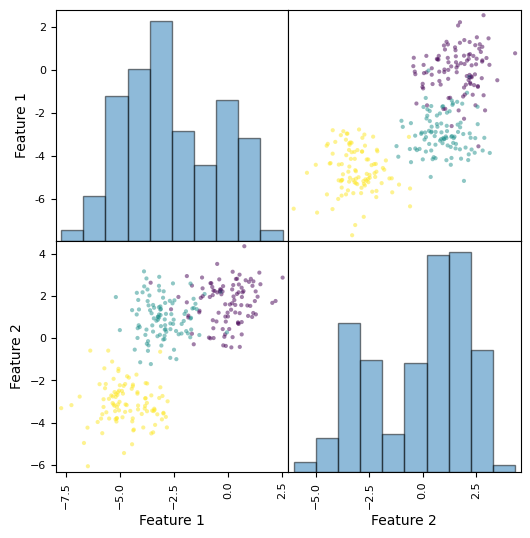

In [9]:
df_toy = pd.DataFrame(X,columns=['Feature 1','Feature 2'])
pd.plotting.scatter_matrix(df_toy, figsize = (6,6), c = y, hist_kwds={'edgecolor':'black','alpha':0.5})

This plot can look a little confusing at first, but it is actually quite simple. The off-diagonal plots show scatter plots of one feature vs another, while the diagonal plots are histograms of each feature in turn. For a simple dataset like we have here there is only 1 unique scatter plot, but in general we will work with multi-dimensional datasets that have more complex relationships (as you will see later in this workbook).

You might be able to see how you could separate different classes in your data from these plots. In order to do this, we are going to use a k-NN classifier. 

When we train a model, we need to separate our data into training and testing data. This is to make sure we have an independent metric for our model performance; while performance on training data is important (we make sure the model has learned the training data), we also need to make sure our model performs well on unseen data. This can be done easily using an sklearn function, ```train_test_split```

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) # Take 20% of the data out for testing

# These are hyperparameters of the k-NN algorithm
neighbours = 5
weights = 'uniform'
# weights = 'distance'

knn_toy = KNeighborsClassifier(neighbours, weights = weights)
knn_toy.fit(X_train,y_train)

KNeighborsClassifier()

We have now trained the algorithm. For k-NN, this is as simple as saving the training points to the model object, as it is an instance-based learning method, but later on we will encounter algorithms that have a more involved training process.

From here, the next step is to try predicting our test data. We know what the true class of each sample should be, so we can identify if the k-NN prediction is right or wrong. We calculate the **classification accuracy**, which is the ratio of correct predictions to the total number of predictions, or the proportion of test points predicted correctly.

In [11]:
pred = knn_toy.predict(X_test)

correct, total = 0, 0
for i in range(len(pred)):
    if pred[i]==y_test[i]:
        correct += 1
    total+=1

print(f"Classification accuracy = {correct/total}")


Classification accuracy = 0.8833333333333333


<div style="background-color:#C2F5DD">


### Exercise One

Now you have the steps to build, train and test a k-NN classifier, try varying the hyperparameters and try to find the best results you can. Hyperparameters to try varying include:
* The value of $k$
* The weight scheme

There are others, take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to see what else you can vary. Make sure to record whatever you do vary!

Record your results and present the information.

### Summary

This section has introduced the k-Nearest Neighbours algorithm, including:
 * Classification & regression examples
 * A toy model for classification
 * The general steps for preparing data, training a model, and testing on test data

The following section describes some of the difficulties we can encounter with machine learning, and how we can handle some of them.

<hr style="border:2px solid gray">
<a id='section-3'></a>

## Section Three: Challenges in ML [^](#outline)



So far, applying ML has seemed pretty simple. However, there are many possible pitfalls with these approaches that you need to be aware of. In fact, there have been several high-profile incidences of machine learning algorithms going wrong. These include:

* Amazon's development of an AI tool to help shortlist job applicants, which was trained on the previous 10 years of resumes submitted to Amazon. Because these resumes were predominantly from male candidates, the algorithm "learned" that male candidates were more likely to be successful and therefore penalised resumes that had terms identifying it as a female applicant. Attempts were made to reduce the bias but ultimately were unsuccessful and the [project was scrapped](https://www.bbc.co.uk/news/technology-45809919).
* Microsoft's AI chatbot Tay, which was released on Twitter and learned from interacting with people on the platform. [Within 16 hours the project was taken down](https://en.wikipedia.org/wiki/Tay_(chatbot)) as the AI started posting racist and sexist tweets, due to learning from users spamming it with politically incorrect phrases and disciminatory language. 

Because the model just learns from your data, if you are not careful with what is in your training data you can easily produce results that are a) unexpected, and b) undesirable. This is one of the many reasons why it is important to visualise and understand your training dataset.

A few possible challenges include:

* **Insufficient training data**: to build an accurate, generalisable model, you typically need **a lot** of training data; insufficient data means your model can't accurately learn the function $f$ and so cannot make accurate predictions

* **Biased training data**: perhaps more dangerous than insufficient training data, as biased training data can mean your model does very well in some cases, but very poorly in others. This can be e.g. an imbalanced training dataset, where you show more examples of one class than the others, or systematic issues with measurement e.g. poor thermal contact, zero error, background noise etc.

* **Poor quality training data**: if your data is noisy, or has a lot of outliers, your model cannot accurately learn the function mapping inputs to targets. For data with values missing for some features (e.g. if you have issues with measurement equipment) you can mitigate to some extent by either taking a median value or setting it to far outside of a reasonable range so the model learns not to use it.

* **Overfitting**: overfitting describes the situation where a model learns how to predict the training data and **only** the training data. The model is sufficiently complex that it can perfectly fit the training data, e.g. fitting a high order polynomial to data that is perhaps better modelled as a linear relationship with some noise. This results in poor prediction for unseen data, but can be mitigated at training time by including **regularisation**.

* **Underfitting**: the opposite of overfitting, this occurs when your model is not sufficiently complex to capture the features of the data. As a result, it is not capable of learning the function behind the data. An example would be trying to fit a quadratic dataset with a linear model.

<img src=ML_Week5_Photos/over_vs_under_fitting.png align='center'>

*Example of under and over fitting on quadratic data. The generated data is quadratic with Gaussian noise. The linear model clearly underfits and does not accurately approximate the data, whereas the high-order polynomial (order 300) overfits, resulting in predictions that will not generalise despite good performance on the existing data.*


The only way to know if your model has generalised well is to **validate it on data**. As mentioned before, the normal way to do this is to separate your data into **training data** and **testing data**. You use the **training data** to train your model and the **testing data** to test how well it has generalised. If there is a large difference in the performance of the model on the training data compared to the performance on the testing data it shows that your model has been **overtrained** and is learning features that are specific to your training data. 

**Note:** *What fraction of your data should you use to train and what fraction to test?* There is no single answer to this question, but in most cases the training:testing ratio is around 80:20 or 70:30.



Of course, because we can vary hyperparameters or even the specific algorithm we choose to use for the problem, this isn't all we need to consider. Historically, it was common to iterate on an ML algorithm, varying hyperparameters, until the performance on the **test data** was deemed sufficiently good. Of course, if this is done, you are implicitly learning the test data to some degree, just through your hyperparameter optimisation, rather than during the training procedure. 

To get around this, the idea of cross validation came around. This is where you break down the training set into a number of smaller sets called **folds**. You then train your model with all but one of these folds and evaluate with remaining fold. This way you get an array of evaluations (which we will meet this later on in this notebook) to validate individual attempts at training a model. Your test data can (and should) be kept to one side for final evaluation after you have finished optimising your model training. 

<div style="background-color:#FFCCCB">

### $T$-fold Cross-Validation

This is when we **split our data** into **training-validation** sets $T$-times (sometimes can be called $k$-fold Cross-Validation, but we have used a $T$ to avoid confusion with k-NN) to reduce the risk of **overfitting** to the full training data or to parts of the training data.

Mathematically, the procedure is as follows. We split the data $\mathcal{S}=\{\mathbf{x}^{(i)}, y^{(i)}\}$ for $i=1,...,N$ equally sized subsets $\mathcal{S_{t}}$ such that
\begin{equation*}
\mathcal{S}=\bigcup_{t=1}^{T}\mathcal{S}_{t} \; \text{and} \; |\mathcal{S}_{t}|=\frac{|\mathcal{S}|}{T},
\end{equation*}
where $|\mathcal{S_{m}}|$ is the size of the $mth$ subset. We set aside one of the subsets and train the model on the rest of the samples i.e. $\overline{\mathcal{S_{t}}}=\mathcal{S}-\mathcal{S_{t}}$. We learn a model $\hat{f}_{\overline{\mathcal{S_{t}}}}$, which we use to predict $\mathcal{S_{t}}$. We then compute an error measure for the prediction on $\mathcal{S_{t}}$ (for example the classification accuracy):
\begin{equation*}
\text{Accuracy}_t = \frac{N_{\text{correct}}^t}{N_{\text{total}}^t}, 
\end{equation*}
where $\text{Accuracy}_t$ denotes the accuracy of the model trained on subset $\overline{\mathcal{S}_{t}}$, and $N_{\text{correct}}^T$ and $N_{\text{total}}^t$ denote the total number of correct predictions and total number of predictions made on the subset $\mathcal{S}_t$ respectively.

The same process is done in turn for each of the subsets of our split $\mathcal{S}_{t}$, $t=1,..,T$ in each case obtaining a different model for their corresponding complement. 

We then compute the average classification accuracy over all $T$-folds:
\begin{equation*}
\langle\text{Accuracy}\rangle=\frac{1}{T}\sum_{t=1}^{T}\text{Accuracy}_t.
\end{equation*}

This average classification accuracy is then a measure of how well the model predicts *out-of-sample*. 

**Choosing number of folds $T$:** It seems clear that the way in which we split the data into training and validation, and the balance between both sets, will effect the results of the cross-validation. The extreme case is $T=N$, which is called **leave-one-out** cross-validation (LOO-CV). This tests how well each sample can be predicted from the rest of the samples. However this is computationally expensive and **not necessary**.

In practice, the number of folds $T$ is chosen based on the size of the data and the amount of computing power available (larger $T$ means more models need fitting). Typically $T=5$ is used for a smaller dataset and $T=10$ for larger ones, so that one does out-of-sample prediction on validation sets that contain around $10%$ od the data

More information can be found [here](https://machinelearningmastery.com/k-fold-cross-validation/).

It is easy to do cross-validation using sklearn, using the ```cross_val_score``` function. Each ML algorithm in sklearn has an default **scorer**, which for the case of classification algorithms is the classification accuracy. You will see more details about ML performance metrics in a couple weeks time, but for now we will use cross validation with our toy k-NN model to see how it works:

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_toy, X_train, y_train)

array([0.95833333, 0.91666667, 0.97916667, 0.91666667, 0.97916667])

<div style="background-color:#C2F5DD">

### Exercise Two

Calculate the ```cross_val_score``` for different combinations of hyperparameters you investigated in Exercise One. 

Does cross-validation score correlated with test data performance? Why/why not?

In [ ]:
# Define your hyperparameters


# Define your k-NN


# Train your k-NN


# Your cross-validation code here

Of course, as mentioned before ```cross_val_score``` is defined the same for each type of ML algorithm implemented in sklearn; to illustrate this, we are going to introduce (very briefly) another algorithm: the Support Vector Machine (SVM). We won't talk about details here but you will see the full detail of this algorithm next week. In fact, the syntax of setting up and training a SVM classifier is actually pretty much identical to what you have seen already with k-NN, albeit with different hyperparameters:

In [15]:
from sklearn.svm import SVC

C = 1
kernel = 'linear'

svc_toy = SVC(C = C, kernel = kernel)

svc_toy.fit(X_train, y_train)

SVC(C=1, kernel='linear')

For SVC, the prediction syntax is the same as for k-NN. Write some code in the following cell to predict the values for X_test and calculate the classification accuracy of this SVC model.

In [16]:
# Your prediction code here


# Your classification accuracy calculation here


<div style="background-color:#C2F5DD">

### Exercise Three

* Use the help function to look up the hyperparameters for support vector classification
* Try varying the hyperparameters and checking your results using both cross validation and test classification accuracy
* How do your SVC results compare to your k-NN results?

In [ ]:
# Hyperparameters for SVC




In [ ]:
# Vary hyperparameters & record results of cross validation & test accuracy




### Summary

This section has outlined some of the possible issues with machine learning, as well as how they might be tackled, including:

* issues with dataset bias, insufficient training data, over and under fitting
* T-fold Cross Validation

Additionally, the support vector machine has been (briefly) introduced for classification, to compare with the k-NN shown previously. The following section will describe the dataset you will be working with for the remainder of this week.

<hr style="border:2px solid gray">

## Section Four: The IRIS dataset [^](#outline)
<a name="section-4"></a>


For the remainder of this workbook, we will be using one of the most famous datasets in machine learning. First published outside of the context of ML in 1936, this dataset describes three different types of iris flowers (*versicolor*, *setosa* and *virginica*) based on four different metrics: petal length, petal width, sepal length and sepal width. A photograph illustrating these features can be seen in the figure below.

<img src=ML_Week5_Photos/iris-machinelearning.png align='center'>

*Different kinds of iris used in the IRIS dataset, with the petal and sepal labelled on the iris versicolor ([source](https://www.datacamp.com/tutorial/machine-learning-in-r)).*

Further details about this dataset can be found online, e.g. on [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) and in the [original paper](https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x). This dataset is commonly used for testing new classification algorithms and just generally is widely applied, although the dataset itself is quite small. It is sufficiently popular that it is built into a lot of different machine learning codebases, including Scikit-Learn. It is easy to import:

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()


The loaded IRIS dataset is contained within a dictionary. We can list the keys of the dictionary to see what is contained within the data:

In [18]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


<div style="background-color:#C2F5DD">


Quick exercise: Use the ```print``` function to print the description of the dataset.

In [ ]:
# Your code here

For the remainder of this week, you will be using the IRIS dataset and the two classification algorithms we have touched on so far. 

___

<a name="section-5"></a>

# Section 5: Exercises [^](#outline)

These exercises are here for you to get more experience using the algorithms presented earlier in this notebook. In each section, code cells have been given to help prompt you on each step to work through, but feel free to make your own steps if you want - just make sure you work through each of the tasks.

## IRIS Dataset

<div style="background-color:#C2F5DD">

Visualise the IRIS dataset using pandas ```scatter_matrix```. Remember that the data must be put into a DataFrame to use this function.


In [ ]:
# Construct a DataFrame


In [ ]:
# Plot the scatter matrix


* From these plots, what can you say about the three classes here? 
* Are there any immediately obvious ways to separate any class?

Once you are happy with the dataset, we will move on to applying some ML techniques to try to classify these irises.

## k-NN classification

<div style="background-color:#C2F5DD">

Much like we did for the toy model, we are going to try applying k-NN to the IRIS dataset. 

* First, prepare the dataset for the k-NN - remember to split into train & test datasets
* Define the k-NN, including hyperparameters
* Train the k-NN
* Predict the test data and calculate the classification accuracy
* Calculate the cross-validation score

In [ ]:
# Prepare the dataset


# Split into train & test data



In [ ]:
# Define the k-NN






In [ ]:
# Train the k-NN



In [ ]:
# Predict test data


# Calculate classification accuracy



In [ ]:
# Calculate cross-validation score



<div style="background-color:#C2F5DD">

Now that you have tried using a k-NN for the IRIS dataset, try varying the hyperparameters to see how good a performance you can get. 

* Make sure to record your results & the corresponding hyperparameters, and present the results.
* Remember you can use the ```help``` function to see what arguments to ```KNeighborsClassifier``` do
* Remember to use cross-validation each time
* Are there any particular classes that your model seems to perform well/poorly on? Where might it get "confused" between different classes?

In [ ]:
# Define hyperparameters




In [ ]:
# Define & train model for a given set of hyperparameters



In [ ]:
# Predict test data & calculate classification accuracy



In [ ]:
# Calculate cross-validation score



## Support vector classification (SVC)

<div style="background-color:#C2F5DD">


Now we are going to do the same analysis, using SVC. As mentioned before, you will see this algorithm in more detail next week, but you can still apply the same syntax as for the k-NN. As before:

* Prepare the dataset - keep the same train/test split (it is determined randomly, can you do anything about this?) to compare with k-NN
* Define the SVC, including hyperparameters
* Train the SVC
* Predict the test data and calculate the classification accuracy
* Calculate the cross-validation score

In [ ]:
# Prepare the dataset


# Split into train & test data



In [ ]:
# Define the SVC (including hyperparameters)






In [ ]:
# Train the SVC



In [ ]:
# Predict test data


# Calculate classification accuracy



In [ ]:
# Calculate cross-validation score



<div style="background-color:#C2F5DD">

Once again, now try varying the model hyperparameters to get the best performance you can. Steps are the same as before:

* Make sure to record your results & the corresponding hyperparameters, and present them.
* Remember you can use the ```help``` function to see what arguments to ```SVC``` do
* Remember to use cross-validation each time
* Are there any particular classes that your model seems to perform well/poorly on? Where might it get "confused" between different classes?


In [ ]:
# Define hyperparameters




In [ ]:
# Define & train model for a given set of hyperparameters



In [ ]:
# Predict test data & calculate classification accuracy



In [ ]:
# Calculate cross-validation score



<div style="background-color:#C2F5DD">


Finally, which model performed the best, and for what hyperparameters? Compare k-NN & SVC.